<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:step1 its the begining of a neural network(Node map) that recieve input from our dataset

### Hidden Layer:step2 after the input layer, its called hidden because it can't be accesed directly only thru the input layer, it's indside of the network that performs a function and outputs a value

### Output Layer:step3 the final layer of a neural network, output a vector of values 

### Neuron: Is a weighted unit that is connected to input and output, it produces an   output with a function

### Weight: is how strong of a conection is, higher weight = strong conection input effects output alot more , 0 weight = no connection opp.

### Activation Function: Each node/neoron has activation function, each node in a layer typically has the same act. function, this function decides wheter or not the node fires to pass signal to the next layer

### Node Map: a visual diagram of the architecture of a neural network

### Perceptron: a bsic neural network model, a single node of a NN, it can take any number  of input for one output value, 


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### 

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import numpy as np

inputs = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

correct_outputs = [[1], [1], [1], [0]]

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [3]:
# initialize random weights
weights = np.random.random((2, 1))
weights

array([[0.05773152],
       [0.38386156]])

In [4]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.        ],
       [0.05773152],
       [0.38386156],
       [0.44159308]])

In [5]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.5       ],
       [0.51442887],
       [0.59480413],
       [0.60863856]])

In [6]:
error = correct_outputs - activated_output
error

array([[ 0.5       ],
       [ 0.48557113],
       [ 0.40519587],
       [-0.60863856]])

In [7]:
adjustments = error * sigmoid_derivative(activated_output)
adjustments

array([[ 0.11750186],
       [ 0.11370292],
       [ 0.09284228],
       [-0.13889456]])

In [8]:
weights += np.dot(inputs.T, adjustments)
weights

array([[0.03253987],
       [0.33780927]])

In [9]:
for iteration in range(1000):
    weighted_sum = np.dot(inputs, weights)
    
    activated_output = sigmoid(weighted_sum)
    
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    weights += np.dot(inputs.T, adjustments)
    
print('weights after train:')
print(weights)

print('output after training:')
print(activated_output)

weights after train:
[[-2.91433544e-16]
 [ 1.24900090e-16]]
output after training:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
X = df.iloc[:, [0,1, 2, 3, 4, 5, 6, 7]].values
y = df['Outcome'].values

In [51]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, 0)

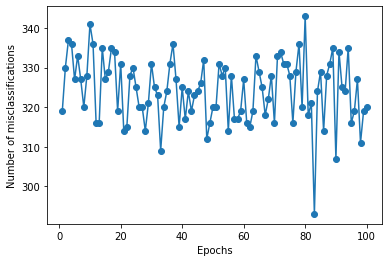

In [52]:
pn = Perceptron(0.1, 100)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [53]:
df['Predictions'] = pn.predict(X)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predictions
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [54]:
(df['Outcome'] == df['Predictions']).value_counts()

True     528
False    240
dtype: int64

In [55]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [56]:
df['Predictions'].value_counts()

0    574
1    194
Name: Predictions, dtype: int64

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?